## Example Contrail Grid Data Product

### Domain

- Time: `2020-01-05 00:00:00` - `2020-01-11 23:00:00`
- Flight levels: [290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410] in ft / 100
- Aircraft: *A320*
- Flight bearing: *90&#176;*
- Flight speed: *Set to nominal for flight level based on BADA data*

### Data Format

**Data Coordinates**:

- `longitude`: EPSG:4326 [-100, 100)
- `latitude`: EPSG:4326 [-30, 75]
- *Altitude*:
    - **NetCDF**: `flight_level`: Flight level [ft / 100]
    - **Grib**: `isobaricInhPa`: Pressure level, [hPa]
- `time`: UTC time, formatted as `np.datetime64[ns]`

**Auxillary dimensions**:

*NetCDF* only

- `level` (flight_level): Pressure level [hPa] 
- `air_pressure` (flight_level): Air pressure [Pa]
- `altitude` (flight_level): Altitude above mean sea level calculated with the [International Standard Atmosphere](https://en.wikipedia.org/wiki/International_Standard_Atmosphere)

**Data variables**:

- `ef_per_m`: the energy forcing (EF) per distance flown in a grid cell, $[ \text{J} \ \text{m}^{-1} ]$.

### Data Access

- Available in storage bucket [gs://contrails-301217-grid-sample-data/2020-01-05/](https://console.cloud.google.com/storage/browser/contrails-301217-grid-sample-data/2020-01-05/)
- Download using [google-cloud-sdk](https://cloud.google.com/sdk/docs/quickstart) command line tools

```
# download netcdf files
$ mkdir -p netcdf
$ gsutil -m cp -r "gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/*" netcdf

# download zarr files
$ mkdir -p zarr
$ gsutil -m cp -r "gs://contrails-301217-grid-sample-data/2020-01-05/zarr/*" zarr

# download grib files
$ mkdir -p grib
$ gsutil -m cp -r "gs://contrails-301217-grid-sample-data/2020-01-05/grib/*" grib
```

### Requirements

This notebook requires:

- [xarray](https://xarray.pydata.org/en/stable/index.html) to read NetCDF/Zarr files
- [cfgrib](https://github.com/ecmwf/cfgrib) to read GRIB files via `xarray`.

```
$ pip install xarray

# cfgrib requires binary dependencies, so its easiest to install with:
$ conda install -c conda-forge cfgrib

# or you can install the binary dependencies yourself:
$ brew install eccodes (mac)
$ sudo apt-get install eccodes (linux)
$ pip install cfgrib
```

In [4]:
# download netcdf from ths notebook
!mkdir -p netcdf
!gsutil -m cp -r "gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/*" netcdf

If you experience problems with multiprocessing on MacOS, they might be related to https://bugs.python.org/issue33725. You can disable multiprocessing by editing your .boto config or by adding the following flag to your command: `-o "GSUtil:parallel_process_count=1"`. Note that multithreading is still available even if you disable multiprocessing.

Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.00.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.01.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.02.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.03.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.04.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.05.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/20200105.06.nc...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/netcdf/202

In [6]:
# download grib from the notebook
!mkdir -p grib
!gsutil -m cp -r "gs://contrails-301217-grid-sample-data/2020-01-05/grib/*" grib

If you experience problems with multiprocessing on MacOS, they might be related to https://bugs.python.org/issue33725. You can disable multiprocessing by editing your .boto config or by adding the following flag to your command: `-o "GSUtil:parallel_process_count=1"`. Note that multithreading is still available even if you disable multiprocessing.

Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.00.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.01.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.02.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.03.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.04.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.05.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/grib/20200105.06.grib2...
Copying gs://contrails-301217-grid-sample-data/2020-01-05/gri

### Load Data (NetCDF)

In [7]:
import xarray as xr
import numpy as np

In [8]:
# open single hour
filename = "netcdf/20200105.00.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:       (longitude: 400, latitude: 200, flight_level: 13, time: 1)
Coordinates:
  * longitude     (longitude) float64 -100.0 -99.5 -99.0 ... 98.5 99.0 99.5
  * latitude      (latitude) float64 -30.0 -29.5 -29.0 -28.5 ... 68.5 69.0 69.5
    level         (flight_level) float64 ...
  * time          (time) datetime64[ns] 2020-01-05
    air_pressure  (flight_level) float64 ...
    altitude      (flight_level) float64 ...
  * flight_level  (flight_level) float64 410.0 400.0 390.0 ... 310.0 300.0 290.0
Data variables:
    ef_per_m      (longitude, latitude, flight_level, time) float64 ...
Attributes:
    description:       Contrail evolution results
    max_age:           16 hours
    dt:                10 minutes
    fuel data source:  BADA4
    azimuth:           90

In [9]:
# open all hours
filenames = "netcdf/*.nc"
ds = xr.open_mfdataset(filenames)
ds

<xarray.Dataset>
Dimensions:       (longitude: 400, latitude: 200, flight_level: 13, time: 168)
Coordinates:
  * longitude     (longitude) float64 -100.0 -99.5 -99.0 ... 98.5 99.0 99.5
  * latitude      (latitude) float64 -30.0 -29.5 -29.0 -28.5 ... 68.5 69.0 69.5
    level         (flight_level) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * time          (time) datetime64[ns] 2020-01-05 ... 2020-01-11T23:00:00
    air_pressure  (flight_level) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    altitude      (flight_level) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * flight_level  (flight_level) float64 410.0 400.0 390.0 ... 310.0 300.0 290.0
Data variables:
    ef_per_m      (longitude, latitude, flight_level, time) float64 dask.array<chunksize=(400, 200, 13, 1), meta=np.ndarray>
Attributes:
    description:       Contrail evolution results
    max_age:           16 hours
    dt:                10 minutes
    fuel data source:  BADA4
    azimuth:           90

### Plot data

In [10]:
# open single hour
filename = "netcdf/20200105.01.nc"
ds = xr.open_dataset(filename)

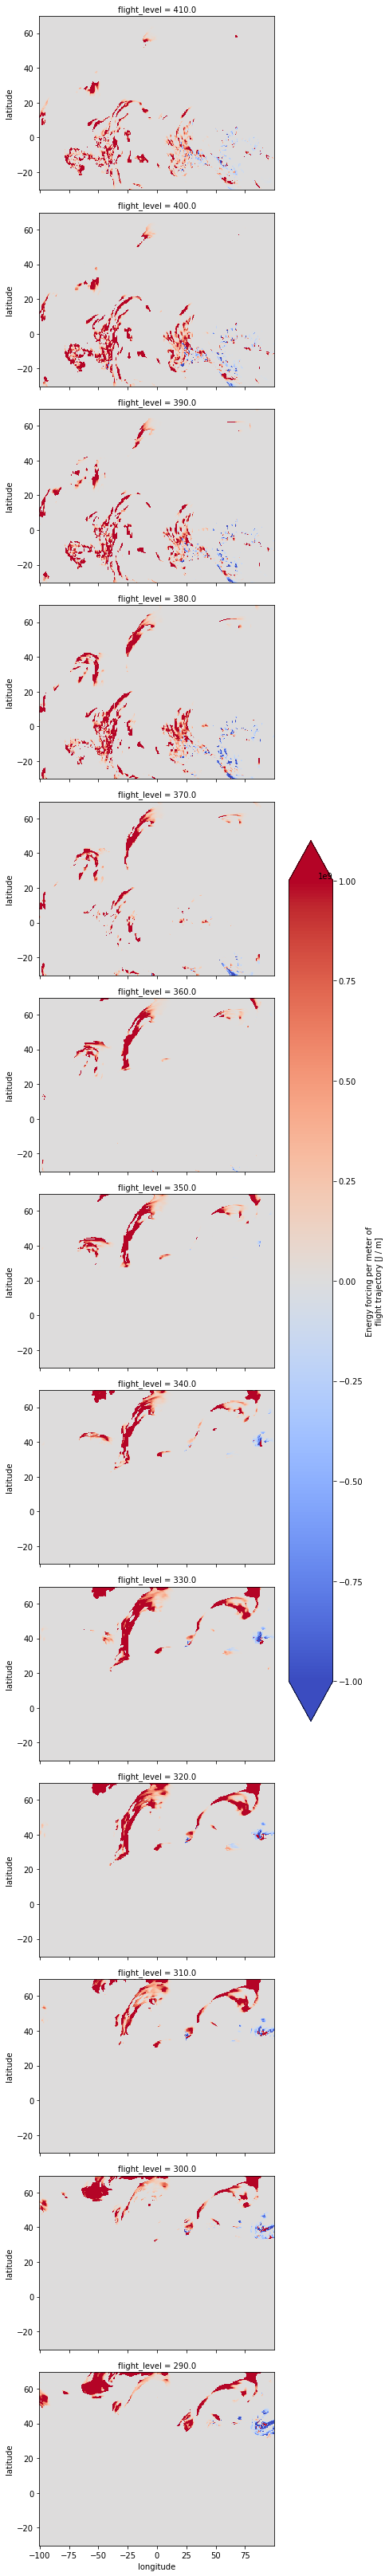

In [11]:
# select a single pressure level for "ef_per_m"
da = ds["ef_per_m"]

# plot
da.squeeze().plot(x="longitude", y="latitude", row="flight_level", figsize=(6, 45), vmin=-1e9, vmax=1e9, cmap="coolwarm");

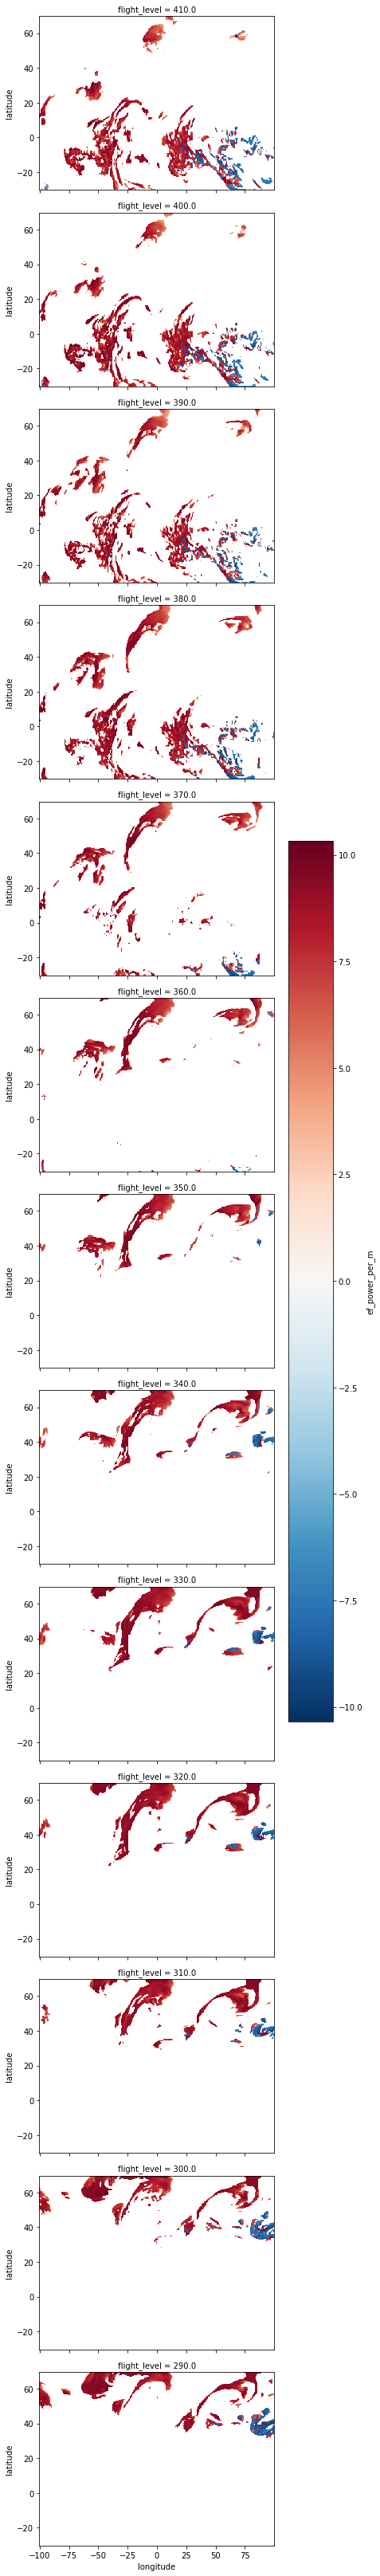

In [12]:
# show on log scale
ef = ds["ef_per_m"].where(ds["ef_per_m"] != 0)
log_ef = np.sign(ef) * np.log10(np.abs(ef))
log_ef.name = 'ef_power_per_m'

# plot
log_ef.squeeze().plot(x="longitude", y="latitude", row="flight_level", figsize=(6, 45));

## Load Data (GRIB)

Note that the data format is slight different in the GRIB format to conform to GRIB standards:

- Altitude dimension is `isobaricInhPa` (instead of `flight_level` or `level`). Note that the level gets rounded to the nearest hPa in translation to GRIB. Each value corresponds to flight levels [290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410], respectively.
- Data variable is `p80.128` (instead of `ef_per_m`). The data is still in units of `J / m`.

In [1]:
import xarray as xr
import numpy as np
import cfgrib

ModuleNotFoundError: No module named 'cfgrib'

In [2]:
# open single hour
filename = "grib/20200105.01.grib2"
ds = xr.open_dataset(filename, engine="cfgrib")
ds

ValueError: unrecognized engine cfgrib must be one of: ['netcdf4', 'scipy', 'store']

In [15]:
# open all hours
filenames = "grib/*.grib2"
ds = xr.open_mfdataset(filenames, combine="nested", concat_dim="time")
ds

Ignoring index file '/Users/marcus/computing/daitem/contrails/admin/prototypes/airbus/2020-01-05/grib/20200105.01.grib2.923a8.idx' incompatible with GRIB file


,Array,Chunk
Bytes,666.50 MiB,3.97 MiB
Shape,"(168, 13, 200, 400)","(1, 13, 200, 400)"
Count,672 Tasks,168 Chunks
Type,float32,numpy.ndarray


In [16]:
# plot single hour
filename = "grib/20200105.01.grib2"
ds = xr.open_dataset(filename)

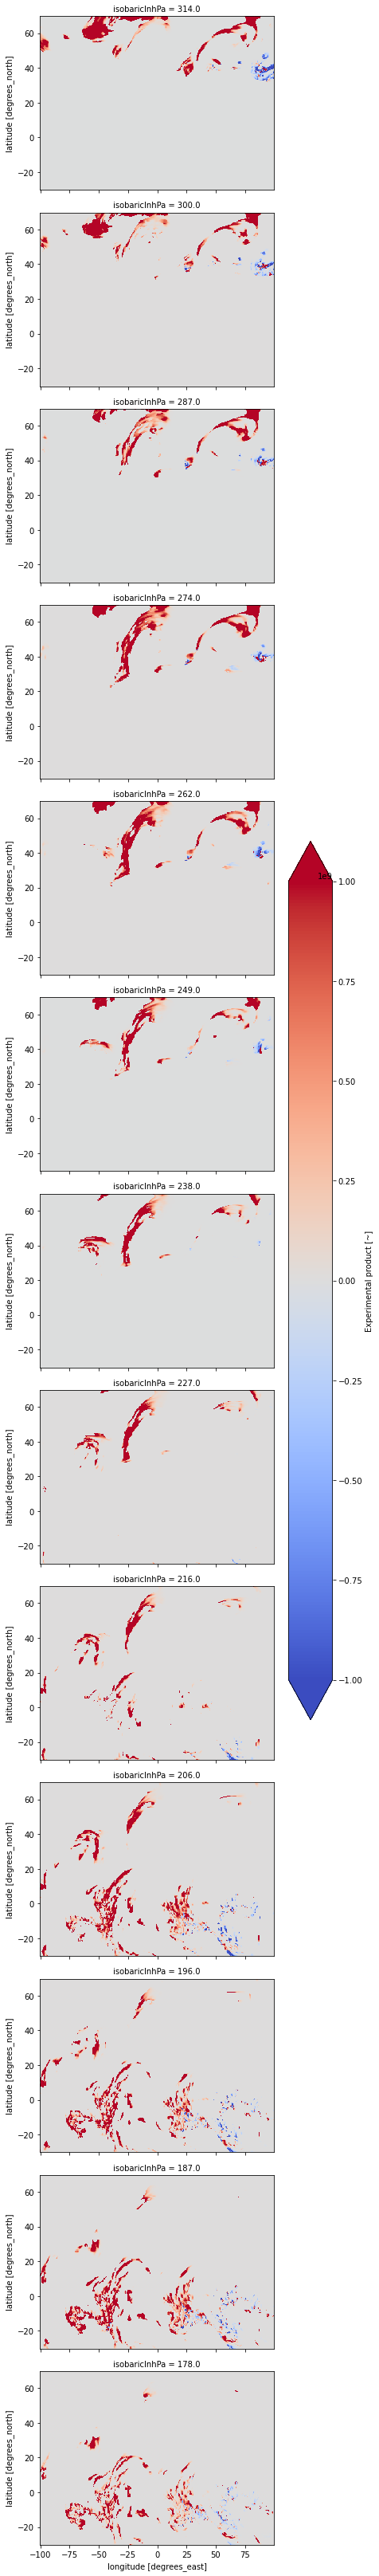

In [17]:
# select a single pressure level for "ef_per_m"
da = ds["p80.128"]

# plot
da.plot(x="longitude", y="latitude", row="isobaricInhPa", figsize=(6, 45), vmin=-1e9, vmax=1e9, cmap="coolwarm");